# You can download videos here !
https://iutbox.iut.ac.ir/index.php/s/S5b59WsFe2AJE9b

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h1>Import Titanic Raw</h1>
<p1>
    <font size="4">
        First we import raw data set, that is not in a shape that we like
    </font>
</p1>

In [2]:
titanic = pd.read_csv("titanic_raw.csv")

In [3]:
titanic

,,,,,This,is,the,Titanic,Dataset.
It,contains,all,passengers,that,were,aboard,the,titanic,when
the,tragic,disaster,occured,in,the,year,19,1,2
0,0,3,male,22.0,1,0,$7.25,S,NaN
1,1,1,female,38.0,1,0,$71.2833,C,C
2,1,3,female,26.0,0,0,$7.925,S,NaN
...,...,...,...,...,...,...,...,...,...
891,0,2,male,24.0,0,0,$10.5,S,NaN
892,0,3,male,34.0,1,1,$14.4,S,NaN
893,0,3,male,36.0,0,0,$7.8958,S,NaN
End,of,the,Dataset,,,,NaN,NaN,NaN


In [4]:
titanic = pd.read_csv("titanic_raw.csv",skiprows=3,header=None,skipfooter=2,usecols=range(1,10))
titanic

/tmp/ipykernel_8910/455810174.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  titanic = pd.read_csv("titanic_raw.csv",skiprows=3,header=None,skipfooter=2,usecols=range(1,10))


,1,2,3,4,5,6,7,8,9
0,0,3,male,22.0,1,0,$7.25,S,NaN
1,1,1,female,38.0,1,0,$71.2833,C,C
2,1,3,female,26.0,0,0,$7.925,S,NaN
3,1,1,female,35.0,1,0,$53.1,S,C
4,0,3,male,35.0,0,0,$8.05,S,NaN
...,...,...,...,...,...,...,...,...,...
889,1,1,male,26.0,0,0,$30.0,C,C
890,0,3,male,32.0,0,0,$7.75,Q,NaN
891,0,2,male,24.0,0,0,$10.5,S,NaN
892,0,3,male,34.0,1,1,$14.4,S,NaN


In [5]:
titanic.columns = ["survived" , "Pclass" , "Sex" , "Age","sibsp","parch","fare","embarked","deck"]

In [6]:
titanic

,survived,Pclass,Sex,Age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,$7.25,S,NaN
1,1,1,female,38.0,1,0,$71.2833,C,C
2,1,3,female,26.0,0,0,$7.925,S,NaN
3,1,1,female,35.0,1,0,$53.1,S,C
4,0,3,male,35.0,0,0,$8.05,S,NaN
...,...,...,...,...,...,...,...,...,...
889,1,1,male,26.0,0,0,$30.0,C,C
890,0,3,male,32.0,0,0,$7.75,Q,NaN
891,0,2,male,24.0,0,0,$10.5,S,NaN
892,0,3,male,34.0,1,1,$14.4,S,NaN


<h2>Can be more clean ! (preprocessing)</h2>
    <p1>
    <font size="3">Check all columns to find inconsistency</font>
   
</p1>
    
    

In [7]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 894 entries, 0 to 893
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   survived  894 non-null    object
 1   Pclass    894 non-null    int64 
 2   Sex       894 non-null    object
 3   Age       758 non-null    object
 4   sibsp     894 non-null    int64 
 5   parch     894 non-null    int64 
 6   fare      894 non-null    object
 7   embarked  892 non-null    object
 8   deck      203 non-null    object
dtypes: int64(3), object(6)
memory usage: 63.0+ KB


# survived

In [8]:
titanic["survived"].value_counts()

0      551
1      341
yes      1
no       1
Name: survived, dtype: int64

In [9]:
titanic["survived"] = titanic["survived"].replace("yes",1)

In [10]:
titanic["survived"] = titanic["survived"].replace("no",0)

In [11]:
titanic["survived"].value_counts()

0    551
1    341
1      1
0      1
Name: survived, dtype: int64

as you can see some values is in the string type 


In [12]:
titanic["survived"] = titanic["survived"].astype(int)

In [13]:
titanic["survived"].value_counts()

0    552
1    342
Name: survived, dtype: int64

In [14]:
titanic["survived"].mean()*100

38.25503355704698

# fare

In [15]:
titanic["fare"] = titanic["fare"].str.replace("$","")

/tmp/ipykernel_8910/453290000.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  titanic["fare"] = titanic["fare"].str.replace("$","")


In [16]:
titanic["fare"] = titanic["fare"].astype(float)

In [17]:
titanic["fare"].value_counts()

8.0500     43
13.0000    42
7.8958     39
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: fare, Length: 248, dtype: int64

In [18]:
titanic["fare"].nlargest()

258    512.3292
679    512.3292
737    512.3292
27     263.0000
88     263.0000
Name: fare, dtype: float64

<AxesSubplot: >

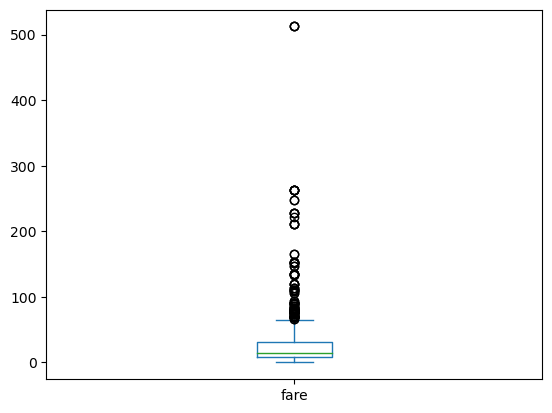

In [19]:
titanic.fare.plot(kind="box")

In [20]:
titanic

,survived,Pclass,Sex,Age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN
...,...,...,...,...,...,...,...,...,...
889,1,1,male,26.0,0,0,30.0000,C,C
890,0,3,male,32.0,0,0,7.7500,Q,NaN
891,0,2,male,24.0,0,0,10.5000,S,NaN
892,0,3,male,34.0,1,1,14.4000,S,NaN


# Pclass

In [21]:
titanic["Pclass"].value_counts()

3    493
1    216
2    185
Name: Pclass, dtype: int64

In [22]:
titanic[titanic.Pclass == 1].fare.mean()

84.15468749999992

In [23]:
titanic[titanic.Pclass == 2].fare.mean()

20.60725243243243

In [24]:
titanic[titanic.Pclass == 3].fare.mean()

13.665295943204871

# Sex

In [25]:
titanic["Sex"].describe()

count      894
unique       2
top       male
freq       580
Name: Sex, dtype: object

In [26]:
titanic["Sex"].value_counts()

male      580
female    314
Name: Sex, dtype: int64

## Age

In [27]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 894 entries, 0 to 893
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  894 non-null    int64  
 1   Pclass    894 non-null    int64  
 2   Sex       894 non-null    object 
 3   Age       758 non-null    object 
 4   sibsp     894 non-null    int64  
 5   parch     894 non-null    int64  
 6   fare      894 non-null    float64
 7   embarked  892 non-null    object 
 8   deck      203 non-null    object 
dtypes: float64(1), int64(4), object(4)
memory usage: 63.0+ KB


In [28]:
titanic["Age"].value_counts()

Missing Data    41
24.0            31
22.0            27
18.0            26
28.0            25
                ..
55.5             1
66.0             1
0.92             1
23.5             1
74.0             1
Name: Age, Length: 92, dtype: int64

In [29]:
titanic["Age"].value_counts(dropna=False)

NaN             136
Missing Data     41
24.0             31
22.0             27
18.0             26
               ... 
55.5              1
66.0              1
0.92              1
23.5              1
74.0              1
Name: Age, Length: 93, dtype: int64

In [30]:
titanic["Age"] = titanic["Age"].replace("Missing Data",np.nan)

In [31]:
titanic["Age"].value_counts(dropna=False)

NaN     177
24.0     31
22.0     27
18.0     26
28.0     25
       ... 
55.5      1
66.0      1
0.92      1
23.5      1
74.0      1
Name: Age, Length: 92, dtype: int64

In [32]:
titanic["Age"] = titanic["Age"].astype(float)

In [33]:
titanic[titanic.Age <1]

,survived,Pclass,Sex,Age,sibsp,parch,fare,embarked,deck
78,1,2,male,0.83,0,2,29.0000,S,NaN
305,1,1,male,0.92,1,2,151.5500,S,C
469,1,3,female,0.75,2,1,19.2583,C,NaN
644,1,3,female,0.75,2,1,19.2583,C,NaN
755,1,2,male,0.67,1,1,14.5000,S,NaN
803,1,3,male,0.42,0,1,8.5167,C,NaN
831,1,2,male,0.83,1,1,18.7500,S,NaN


<AxesSubplot: >

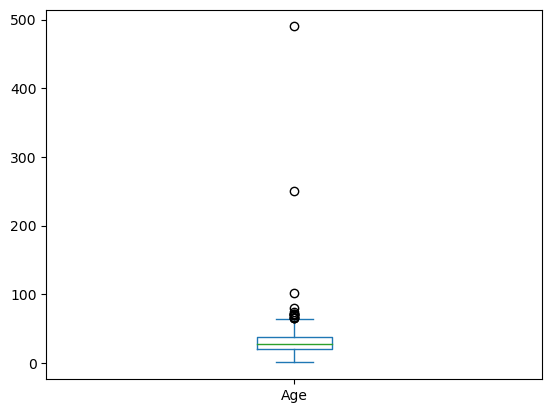

In [34]:
titanic["Age"].plot(kind="box")


In [35]:
titanic.Age.nlargest(10,keep='all')

453    490.0
785    250.0
217    102.0
630     80.0
851     74.0
96      71.0
493     71.0
116     70.5
672     70.0
745     70.0
Name: Age, dtype: float64

In [36]:
titanic.loc[453,"Age"] = 49

In [37]:
titanic.loc[785,"Age"] = 25

In [38]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 894 entries, 0 to 893
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  894 non-null    int64  
 1   Pclass    894 non-null    int64  
 2   Sex       894 non-null    object 
 3   Age       717 non-null    float64
 4   sibsp     894 non-null    int64  
 5   parch     894 non-null    int64  
 6   fare      894 non-null    float64
 7   embarked  892 non-null    object 
 8   deck      203 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 63.0+ KB


# sibsp
sibsp. Number of Siblings/Spouses Aboard.

In [39]:
titanic.sibsp.value_counts().sort_index()

0    610
1    210
2     28
3     16
4     18
5      5
8      7
Name: sibsp, dtype: int64

# parch
parch. Number of Parents/Children Aboard.

In [40]:
titanic.parch.value_counts().sort_index()

0    680
1    119
2     80
3      5
4      4
5      5
6      1
Name: parch, dtype: int64

# embarked


Embarked implies where the traveler mounted from. There are three possible values for Embark — Southampton, Cherbourg, and Queenstown. More than 70% of the people boarded from Southampton. Just under 20% boarded from Cherbourg and the rest boarded from Queenstown.

In [41]:
titanic["embarked"].describe()

count     892
unique      3
top         S
freq      647
Name: embarked, dtype: object

In [42]:
titanic.embarked.value_counts(dropna=False)

S      647
C      168
Q       77
NaN      2
Name: embarked, dtype: int64

In [43]:
titanic[titanic.embarked == "S"].embarked.count() / titanic.embarked.count()

0.7253363228699552

In [44]:
titanic[titanic.embarked == "C"].embarked.count() / titanic.embarked.count()

0.18834080717488788

In [45]:
titanic[titanic.embarked == "Q"].embarked.count() / titanic.embarked.count()

0.08632286995515695

# deck


In [46]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 894 entries, 0 to 893
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  894 non-null    int64  
 1   Pclass    894 non-null    int64  
 2   Sex       894 non-null    object 
 3   Age       717 non-null    float64
 4   sibsp     894 non-null    int64  
 5   parch     894 non-null    int64  
 6   fare      894 non-null    float64
 7   embarked  892 non-null    object 
 8   deck      203 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 63.0+ KB


In [47]:
titanic.deck.describe()

count     203
unique      7
top         C
freq       59
Name: deck, dtype: object

In [48]:
titanic.deck.value_counts(dropna=False)

NaN    691
C       59
B       47
D       33
E       32
A       15
F       13
G        4
Name: deck, dtype: int64

# Lets look at heatmap !

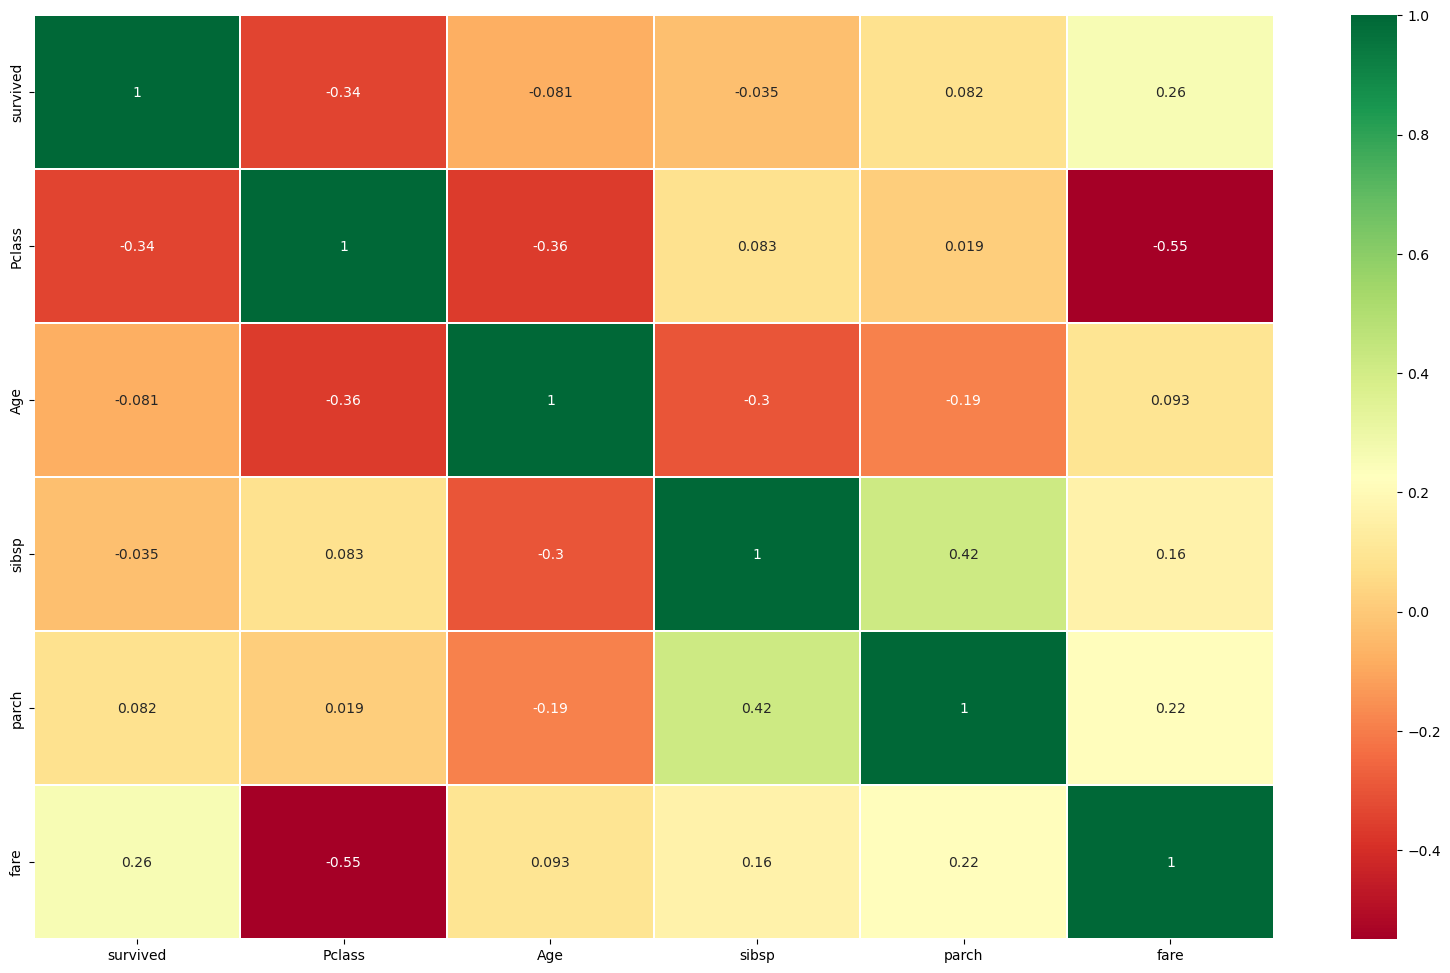

In [49]:
sns.heatmap(titanic.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(20,12)
plt.show()

# Fill NaN values

In [50]:
def missingdata(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    ms=pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    ms= ms[ms["Percent"] > 0]
    
    # show information with a plot 
    
    f,ax =plt.subplots(figsize=(8,6))
    plt.xticks(rotation="vertical")
    fig=sns.barplot(x=ms.index,y=ms.Percent)
    plt.xlabel('Features', fontsize=15)
    plt.ylabel('Percent of missing values', fontsize=15)
    plt.title('Percent missing data by feature', fontsize=15)
    return ms

,Total,Percent
deck,691,77.293065
Age,177,19.798658
embarked,2,0.223714


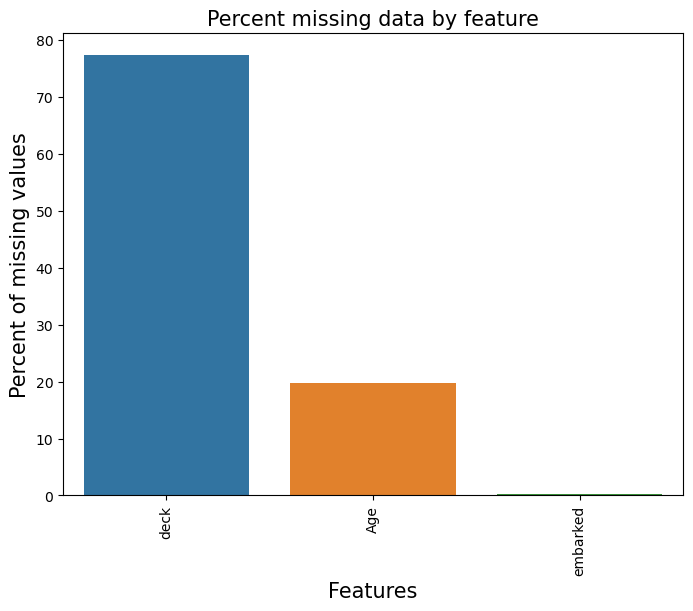

In [51]:
missingdata(titanic)

### Because  of "DATA LEAKAGE"  we should first split dataframe

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
x_train , x_test , y_train , y_test = train_test_split(titanic.drop("survived",axis=1),titanic["survived"],random_state=11,test_size=0.2)

In [54]:
x_train

,Pclass,Sex,Age,sibsp,parch,fare,embarked,deck
556,1,female,48.0,1,0,39.6000,C,A
685,2,male,25.0,1,2,41.5792,C,NaN
277,2,male,NaN,0,0,0.0000,S,NaN
243,3,male,22.0,0,0,7.1250,S,NaN
333,3,male,16.0,2,0,18.0000,S,NaN
...,...,...,...,...,...,...,...,...
269,1,female,35.0,0,0,135.6333,S,C
337,1,female,41.0,0,0,134.5000,C,E
91,3,male,20.0,0,0,7.8542,S,NaN
80,3,male,22.0,0,0,9.0000,S,NaN


In [55]:
TrainList = [x_train , x_test]

In [56]:
for df in TrainList:
    print(df[df["deck"]=='A'].fare.mean())
    
percent = titanic[titanic["deck"]=='A'].fare.mean()
print(f"\npercentage before split :{percent}")

39.97886428571429
34.6542

percentage before split :39.623886666666664


# Handel NaN in deck column

In [57]:
for df in TrainList:
    df.drop(labels=["deck"],axis=1,inplace=True)


In [58]:
TrainList[1]

,Pclass,Sex,Age,sibsp,parch,fare,embarked
395,3,male,22.0,0,0,7.7958,S
739,3,male,NaN,0,0,7.8958,S
232,2,male,59.0,0,0,13.5000,S
582,2,male,54.0,0,0,26.0000,S
814,3,male,30.5,0,0,8.0500,S
...,...,...,...,...,...,...,...
409,3,female,NaN,3,1,25.4667,S
325,1,female,36.0,0,0,135.6333,C
793,1,male,NaN,0,0,30.6958,C
775,3,male,18.0,0,0,7.7500,S


In [59]:
TrainList[0]

,Pclass,Sex,Age,sibsp,parch,fare,embarked
556,1,female,48.0,1,0,39.6000,C
685,2,male,25.0,1,2,41.5792,C
277,2,male,NaN,0,0,0.0000,S
243,3,male,22.0,0,0,7.1250,S
333,3,male,16.0,2,0,18.0000,S
...,...,...,...,...,...,...,...
269,1,female,35.0,0,0,135.6333,S
337,1,female,41.0,0,0,134.5000,C
91,3,male,20.0,0,0,7.8542,S
80,3,male,22.0,0,0,9.0000,S


# Handel NaN in Age column

In [60]:
#method 1
for df in TrainList:
    print(df.Age.mean())

percent = titanic.Age.mean()
print(f"\npercentage before split : {percent}")


29.930970537261697
29.207142857142856

percentage before split : 29.789637377963736


In [61]:
titanic.groupby(["Sex","Pclass"]).Age.agg("mean")

Sex     Pclass
female  1         34.611765
        2         28.722973
        3         21.750000
male    1         41.281386
        2         31.273300
        3         26.574196
Name: Age, dtype: float64

In [62]:
TrainList[0].groupby(["Sex","Pclass"]).Age.agg("mean")

Sex     Pclass
female  1         35.013514
        2         29.116667
        3         21.726190
male    1         40.218202
        2         31.898939
        3         26.580490
Name: Age, dtype: float64

In [63]:
TrainList[1].groupby(["Sex","Pclass"]).Age.agg("mean")

Sex     Pclass
female  1         31.909091
        2         27.035714
        3         21.861111
male    1         49.166667
        2         30.058824
        3         26.549020
Name: Age, dtype: float64

In [64]:
titanic.groupby(["Sex","Pclass"]).Age.transform("mean")  # method 2

0      26.574196
1      34.611765
2      21.750000
3      34.611765
4      26.574196
         ...    
889    41.281386
890    26.574196
891    31.273300
892    26.574196
893    26.574196
Name: Age, Length: 894, dtype: float64

In [65]:
for df in TrainList:
    df.Age.fillna(df.groupby(["Sex","Pclass"]).Age.transform("mean"),inplace=True)

# Handel NaN in embarked column

In [66]:
titanic[titanic.embarked.isnull()]

,survived,Pclass,Sex,Age,sibsp,parch,fare,embarked,deck
61,1,1,female,38.0,0,0,80.0,NaN,B
829,1,1,female,62.0,0,0,80.0,NaN,B


In [67]:
titanic.embarked.mode()[0]

'S'

In [68]:
titanic.groupby(['Pclass',"Sex"])["embarked"].agg(pd.Series.mode)

Pclass  Sex   
1       female    S
        male      S
2       female    S
        male      S
3       female    S
        male      S
Name: embarked, dtype: object

In [69]:
for df in TrainList:
    df["embarked"] = df["embarked"].fillna("S")

In [70]:
for df in TrainList:
    print(df.isnull().sum())
    print("-----------")


Pclass      0
Sex         0
Age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64
-----------
Pclass      0
Sex         0
Age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64
-----------


# Feature Engineering 1
# convert categorical values to numeric values



In [71]:
dummies = pd.get_dummies(titanic[['Sex','embarked']],prefix=['Sex','embarked'])
dummies

,Sex_female,Sex_male,embarked_C,embarked_Q,embarked_S
0,0,1,0,0,1
1,1,0,1,0,0
2,1,0,0,0,1
3,1,0,0,0,1
4,0,1,0,0,1
...,...,...,...,...,...
889,0,1,1,0,0
890,0,1,0,1,0
891,0,1,0,0,1
892,0,1,0,0,1


In [72]:
titanic = pd.concat([titanic , dummies],axis=1)

In [73]:
titanic = titanic.drop(["Sex","embarked"],axis=1)

In [74]:
titanic

,survived,Pclass,Age,sibsp,parch,fare,deck,Sex_female,Sex_male,embarked_C,embarked_Q,embarked_S
0,0,3,22.0,1,0,7.2500,NaN,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,C,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,NaN,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,C,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,NaN,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
889,1,1,26.0,0,0,30.0000,C,0,1,1,0,0
890,0,3,32.0,0,0,7.7500,NaN,0,1,0,1,0
891,0,2,24.0,0,0,10.5000,NaN,0,1,0,0,1
892,0,3,34.0,1,1,14.4000,NaN,0,1,0,0,1


In [75]:
x_train is TrainList[0]

True

In [76]:
x_train

,Pclass,Sex,Age,sibsp,parch,fare,embarked
556,1,female,48.000000,1,0,39.6000,C
685,2,male,25.000000,1,2,41.5792,C
277,2,male,31.898939,0,0,0.0000,S
243,3,male,22.000000,0,0,7.1250,S
333,3,male,16.000000,2,0,18.0000,S
...,...,...,...,...,...,...,...
269,1,female,35.000000,0,0,135.6333,S
337,1,female,41.000000,0,0,134.5000,C
91,3,male,20.000000,0,0,7.8542,S
80,3,male,22.000000,0,0,9.0000,S


In [77]:
dummies = pd.get_dummies(x_train[['Sex','embarked']],prefix=['Sex','embarked'])
x_train = pd.concat([x_train , dummies],axis=1)
x_train = x_train.drop(["Sex","embarked"],axis=1)

In [78]:
x_train

,Pclass,Age,sibsp,parch,fare,Sex_female,Sex_male,embarked_C,embarked_Q,embarked_S
556,1,48.000000,1,0,39.6000,1,0,1,0,0
685,2,25.000000,1,2,41.5792,0,1,1,0,0
277,2,31.898939,0,0,0.0000,0,1,0,0,1
243,3,22.000000,0,0,7.1250,0,1,0,0,1
333,3,16.000000,2,0,18.0000,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
269,1,35.000000,0,0,135.6333,1,0,0,0,1
337,1,41.000000,0,0,134.5000,1,0,1,0,0
91,3,20.000000,0,0,7.8542,0,1,0,0,1
80,3,22.000000,0,0,9.0000,0,1,0,0,1


In [79]:
dummies = pd.get_dummies(x_test[['Sex','embarked']],prefix=['Sex','embarked'])
x_test = pd.concat([x_test , dummies],axis=1)
x_test = x_test.drop(["Sex","embarked"],axis=1)

In [80]:
x_test

,Pclass,Age,sibsp,parch,fare,Sex_female,Sex_male,embarked_C,embarked_Q,embarked_S
395,3,22.000000,0,0,7.7958,0,1,0,0,1
739,3,26.549020,0,0,7.8958,0,1,0,0,1
232,2,59.000000,0,0,13.5000,0,1,0,0,1
582,2,54.000000,0,0,26.0000,0,1,0,0,1
814,3,30.500000,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
409,3,21.861111,3,1,25.4667,1,0,0,0,1
325,1,36.000000,0,0,135.6333,1,0,1,0,0
793,1,49.166667,0,0,30.6958,0,1,1,0,0
775,3,18.000000,0,0,7.7500,0,1,0,0,1


# Make Prediction

In [81]:
from sklearn.linear_model import LogisticRegression # Logistic Regressionn
from sklearn.metrics import confusion_matrix #for confusion matrix

In [82]:
model = LogisticRegression()

In [83]:
model.fit(x_train,y_train)

/home/amir/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [84]:
predict = model.predict(x_test)
predict

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0])

In [85]:
from sklearn.metrics import accuracy_score  #for accuracy_score

In [86]:
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the Logistic Regression is',round(accuracy_score(predict,y_test)*100,2))

--------------The Accuracy of the model----------------------------
The accuracy of the Logistic Regression is 82.12


Text(0.5, 1.05, 'Confusion_matrix')

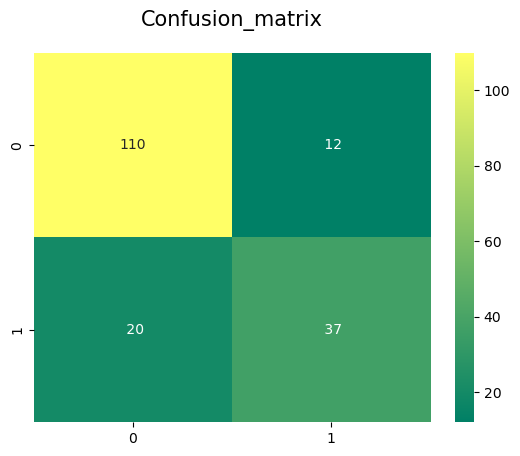

In [87]:
sns.heatmap(confusion_matrix(y_test,predict),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

# Feature Engineering 2

In [88]:
TrainList[0] is x_train

False

In [89]:
TrainList = [x_train , x_test]

In [90]:
for df in TrainList:
    df["family_count"] = df["sibsp"] + df["parch"] + 1


In [91]:
for df in TrainList:
    df['Age_bin'] = pd.cut(df['Age'], bins=[0,12,20,40,120], labels=['Children','Teenage','Adult','Elder'])

In [92]:
titanic.fare.describe()

count    894.000000
mean      32.132824
std       49.625396
min        0.000000
25%        7.903100
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64

In [93]:
for dataset in TrainList:
    dataset['Fare_bin'] = pd.cut(dataset['fare'], bins=[0,7.90,14.45,31,513],  labels=['Low_fare','Median_fare',
                                                                                      'Average_fare','High_fare'],include_lowest=True)

In [94]:
x_train

,Pclass,Age,sibsp,parch,fare,Sex_female,Sex_male,embarked_C,embarked_Q,embarked_S,family_count,Age_bin,Fare_bin
556,1,48.000000,1,0,39.6000,1,0,1,0,0,2,Elder,High_fare
685,2,25.000000,1,2,41.5792,0,1,1,0,0,4,Adult,High_fare
277,2,31.898939,0,0,0.0000,0,1,0,0,1,1,Adult,Low_fare
243,3,22.000000,0,0,7.1250,0,1,0,0,1,1,Adult,Low_fare
333,3,16.000000,2,0,18.0000,0,1,0,0,1,3,Teenage,Average_fare
...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,1,35.000000,0,0,135.6333,1,0,0,0,1,1,Adult,High_fare
337,1,41.000000,0,0,134.5000,1,0,1,0,0,1,Elder,High_fare
91,3,20.000000,0,0,7.8542,0,1,0,0,1,1,Teenage,Low_fare
80,3,22.000000,0,0,9.0000,0,1,0,0,1,1,Adult,Median_fare


In [95]:
x_train=pd.concat([x_train,pd.get_dummies(x_train[["Age_bin","Fare_bin"]],prefix=["AgeBin" , "FareBin"])],axis=1)

In [96]:
x_test=pd.concat([x_test,pd.get_dummies(x_test[["Age_bin","Fare_bin"]],prefix=["AgeBin" , "FareBin"])],axis=1)

In [97]:
x_train.drop(["Age","fare","Age_bin","Fare_bin"],axis=1,inplace=True)

In [98]:
x_test.drop(["Age","fare","Age_bin","Fare_bin"],axis=1,inplace=True)

In [99]:
x_train

,Pclass,sibsp,parch,Sex_female,Sex_male,embarked_C,embarked_Q,embarked_S,family_count,AgeBin_Children,AgeBin_Teenage,AgeBin_Adult,AgeBin_Elder,FareBin_Low_fare,FareBin_Median_fare,FareBin_Average_fare,FareBin_High_fare
556,1,1,0,1,0,1,0,0,2,0,0,0,1,0,0,0,1
685,2,1,2,0,1,1,0,0,4,0,0,1,0,0,0,0,1
277,2,0,0,0,1,0,0,1,1,0,0,1,0,1,0,0,0
243,3,0,0,0,1,0,0,1,1,0,0,1,0,1,0,0,0
333,3,2,0,0,1,0,0,1,3,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,1,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1
337,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1
91,3,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0,0
80,3,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0


In [100]:
x_test

,Pclass,sibsp,parch,Sex_female,Sex_male,embarked_C,embarked_Q,embarked_S,family_count,AgeBin_Children,AgeBin_Teenage,AgeBin_Adult,AgeBin_Elder,FareBin_Low_fare,FareBin_Median_fare,FareBin_Average_fare,FareBin_High_fare
395,3,0,0,0,1,0,0,1,1,0,0,1,0,1,0,0,0
739,3,0,0,0,1,0,0,1,1,0,0,1,0,1,0,0,0
232,2,0,0,0,1,0,0,1,1,0,0,0,1,0,1,0,0
582,2,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0
814,3,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,3,3,1,1,0,0,0,1,5,0,0,1,0,0,0,1,0
325,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1
793,1,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,0
775,3,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0,0


In [101]:
model.fit(x_train,y_train)

LogisticRegression()

In [102]:
pred = model.predict(x_test)

In [103]:
print(round(accuracy_score(y_test,pred)*100,2))
pred_log = round(accuracy_score(y_test,pred)*100,2)

83.24


# KNN

In [104]:
##knn
from sklearn.neighbors import KNeighborsClassifier


In [105]:
model = KNeighborsClassifier()

In [106]:
model.fit(x_train,y_train)

KNeighborsClassifier()

In [107]:
pred = model.predict(x_test)

In [108]:
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the K Nearst Neighbors Classifier is',round(accuracy_score(pred,y_test)*100,2))
pred_KNN = round(accuracy_score(pred,y_test)*100,2)

--------------The Accuracy of the model----------------------------
The accuracy of the K Nearst Neighbors Classifier is 84.36


Text(0.5, 1.05, 'Confusion_matrix')

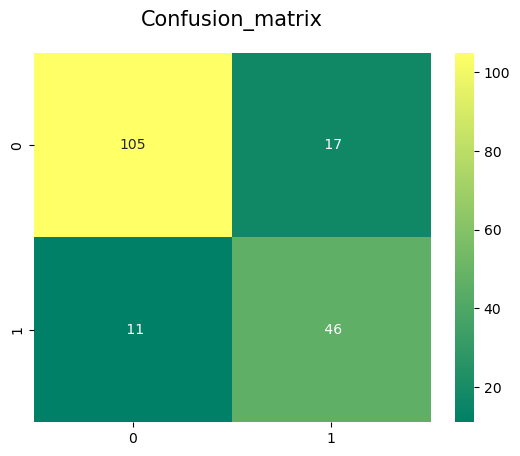

In [109]:
sns.heatmap(confusion_matrix(y_test,pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

# Decision Tree

In [110]:
 from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [111]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(x_train, y_train)

[Text(0.5204156839622641, 0.9642857142857143, 'X[3] <= 0.5\ngini = 0.479\nsamples = 715\nvalue = [430, 285]'),
 Text(0.29127358490566035, 0.8928571428571429, 'X[0] <= 1.5\ngini = 0.317\nsamples = 455\nvalue = [365, 90]'),
 Text(0.15377358490566037, 0.8214285714285714, 'X[12] <= 0.5\ngini = 0.468\nsamples = 107\nvalue = [67, 40]'),
 Text(0.10943396226415095, 0.75, 'X[13] <= 0.5\ngini = 0.5\nsamples = 49\nvalue = [24, 25]'),
 Text(0.1018867924528302, 0.6785714285714286, 'X[9] <= 0.5\ngini = 0.494\nsamples = 45\nvalue = [20, 25]'),
 Text(0.09433962264150944, 0.6071428571428571, 'X[15] <= 0.5\ngini = 0.499\nsamples = 42\nvalue = [20, 22]'),
 Text(0.06792452830188679, 0.5357142857142857, 'X[8] <= 5.0\ngini = 0.495\nsamples = 29\nvalue = [16, 13]'),
 Text(0.06037735849056604, 0.4642857142857143, 'X[8] <= 2.5\ngini = 0.497\nsamples = 28\nvalue = [15, 13]'),
 Text(0.03018867924528302, 0.39285714285714285, 'X[11] <= 0.5\ngini = 0.486\nsamples = 24\nvalue = [14, 10]'),
 Text(0.022641509433962263

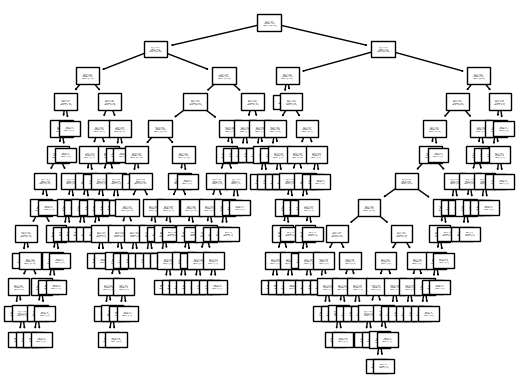

In [112]:
tree.plot_tree(dtree,max_depth=None,fontsize=1)

In [113]:
pred = dtree.predict(x_test)

In [114]:
print(round(accuracy_score(y_test,pred)*100,2))
pred_tree = round(accuracy_score(y_test,pred)*100,2)

84.92


Text(0.5, 1.05, 'Confusion_matrix')

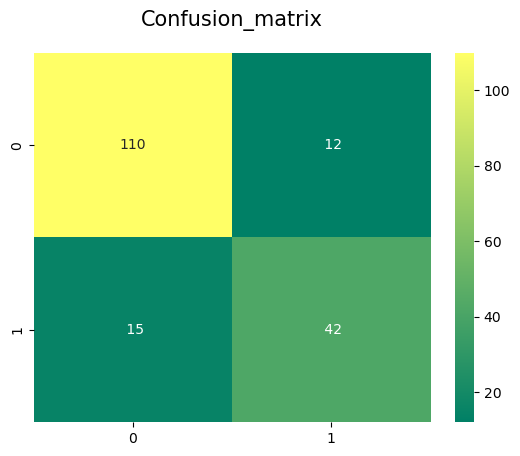

In [115]:
sns.heatmap(confusion_matrix(y_test,pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

In [116]:
x = pd.DataFrame(data=[pred_log,pred_KNN,pred_tree],index=["ReggresionLogistic","KNN","DecisionTree"],columns=["Percentage"])
x

,Percentage
ReggresionLogistic,83.24
KNN,84.36
DecisionTree,84.92
